In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, violinplot

FUNCIONES

In [2]:
#Sería mejor un nombre más descriptivo del tipo de gráfico
def graph(df, column):
    with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (12,4))

        plot0=sns.histplot(data= df, x=column, kde=True,ax=axes[0],color='green')
        axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        axes[0].set_title('Distribution',fontdict={'fontsize':8})
        axes[0].set_xlabel(column,fontdict={'fontsize':7})
        axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
        plt.tight_layout()

        plot1=sns.boxplot(data=df[column],ax=axes[1], orient="v")
        #axes[1].set_title('Distribution of popularity',fontdict={'fontsize':8})
        #Acá sería mejor no harcodear el string:
        axes[1].set_title(f'Distribution of {column}',fontdict={'fontsize':8})
        axes[1].set_xlabel(column,fontdict={'fontsize':7})
        plt.tight_layout()
        
def frecDF(df, column):
    # count y convert de popularity
    frec = df[column].value_counts().sort_index()
    frec_df = pd.DataFrame(frec)
    #Asignamos el nombre Frec_abs a la columna
    frec_df.rename(columns={column:'Frec_abs'},inplace=True)
    #Obtenemos los valores de las Frecuencias Absolutas
    Frec_abs_val = frec_df["Frec_abs"].values
    #Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
    acum = []
    #Iniciamos una variable en la que guardaremos los valores anteriores
    valor_acum = 0
    #Recorremos la lista  de las frecuencias absolutas para irlas sumando
    for i in Frec_abs_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)   
    frec_df["frec_abs_acum"] = acum
    #Calculamos la Frecuencia Relativa en %
    
    #Lo mismo acá
    #frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.popularity),4)
    frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df[column]),4)
    
    #Obtenemos los valores de las Frecuencias Relativas
    Frec_rel_val = frec_df["frec_rel_%"].values
    #Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
    acum = []
    #Iniciamos una variable  en la que guardaremos los valores anteriores
    valor_acum = 0
    #Recorremos la lista  de las frecuencias relativas para irlas sumando
    for i in Frec_rel_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)  
    frec_df["frec_rel_%_acum"] = acum
    return frec_df

### En relacion a frecDF
El proceso está bien, pero podrías evitar buclear si haces un par de ajustes:

In [58]:
def get_freqs(df, column):
    # count y convert de popularity
    frec_df = df[column].value_counts().sort_index().to_frame()
    #Asignamos el nombre Frec_abs a la columna
    frec_df.rename(columns={column:'Frec_abs'},inplace=True)
    #LLamar a la función .cumsum()
    frec_df["frec_abs_acum"]=frec_df['Frec_abs'].cumsum()
    #Calculamos la Frecuencia Relativa en %
    frec_df["frec_rel_%"] = round(frec_df["Frec_abs"]/sum(frec_df['Frec_abs']),4)
    #Es recomendable dejar los porcentajes en base 1. Si es para una visualización, conviene hacer el *100 ahi
    #Y volves a hacer lo mismo
    frec_df["frec_rel_%_acum"] = frec_df["frec_rel_%"].cumsum()
    return frec_df

In [60]:
get_freqs(df,'popularity')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,35017,35017,0.1167,0.1167
1,6918,41935,0.0231,0.1398
2,4831,46766,0.0161,0.1559
3,4288,51054,0.0143,0.1702
4,4075,55129,0.0136,0.1838
...,...,...,...,...
96,2,299993,0.0000,1.0001
97,2,299995,0.0000,1.0001
98,1,299996,0.0000,1.0001
99,1,299997,0.0000,1.0001


In [3]:
#df = pd.read_csv('../../datasetsGrandes/spotifySongs/tracks.csv')
df= pd.read_csv('../../../proyecto-final-datascience/SpotifySongs/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Exploración

In [4]:
df.shape

(299998, 20)

In [5]:
df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [6]:
df.count()

id                  299998
name                299997
popularity          299998
duration_ms         299998
explicit            299998
artists             299998
id_artists          299998
release_date        299998
danceability        299998
energy              299998
key                 299998
loudness            299998
mode                299998
speechiness         299998
acousticness        299998
instrumentalness    299998
liveness            299998
valence             299998
tempo               299998
time_signature      299998
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299998 entries, 0 to 299997
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                299998 non-null  object 
 1   name              299997 non-null  object 
 2   popularity        299998 non-null  int64  
 3   duration_ms       299998 non-null  int64  
 4   explicit          299998 non-null  int64  
 5   artists           299998 non-null  object 
 6   id_artists        299998 non-null  object 
 7   release_date      299998 non-null  object 
 8   danceability      299998 non-null  float64
 9   energy            299998 non-null  float64
 10  key               299998 non-null  int64  
 11  loudness          299998 non-null  float64
 12  mode              299998 non-null  int64  
 13  speechiness       299998 non-null  float64
 14  acousticness      299998 non-null  float64
 15  instrumentalness  299998 non-null  float64
 16  liveness          29

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,299998.0,27.659304,20.105595,0.0,9.0000,28.000000,42.0000,100.000
duration_ms,299998.0,231526.950436,129527.562162,3344.0,173467.0000,212779.500000,263907.0000,5042185.000
explicit,299998.0,0.039300,0.194309,0.0,0.0000,0.000000,0.0000,1.000
danceability,299998.0,0.556669,0.168765,0.0,0.4430,0.570000,0.6820,0.988
energy,299998.0,0.519285,0.256403,0.0,0.3120,0.521000,0.7280,1.000
key,299998.0,5.213075,3.518186,0.0,2.0000,5.000000,8.0000,11.000
loudness,299998.0,-10.659223,5.260261,-60.0,-13.4410,-9.730000,-6.7810,5.109
mode,299998.0,0.663138,0.472638,0.0,0.0000,1.000000,1.0000,1.000
speechiness,299998.0,0.093689,0.160622,0.0,0.0341,0.043700,0.0704,0.970
acousticness,299998.0,0.476738,0.356805,0.0,0.1100,0.473000,0.8260,0.996


Vamos a analizar --> popularity / energy / tempo

In [9]:
df.popularity.describe()

count    299998.000000
mean         27.659304
std          20.105595
min           0.000000
25%           9.000000
50%          28.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

Eliminamos los 0s de popularity para ver como quedaria una gráfica potable (acá no sabemos si en realidad + de 40K de songs no fueron puntuadas o si las puntuaron con 0)

In [10]:
df_popularity=df[df['popularity']!=0]
df_popularity.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.151,0.127,104.851,3
13,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,186800,0,['Lucien Boyer'],['4mSouLpNSEY1d7OdIjlFiP'],1922,0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.163,0.897,127.531,4
26,112adU33vo4C1eRZct2hWy,Nuits De Chine,4,180800,0,['Louis Lynel'],['28pbIiOohRRZjqpAM9iqYM'],1922,0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.196,0.400,139.575,3
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.183,0.211,89.822,4
150,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,161933,0,"['Louis Armstrong', 'Earl Hines']","['19eLuQmk9aCobbVDHc6eek', '2mY5u4CceAPrpBnse1...",1923,0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.204,0.901,104.606,4


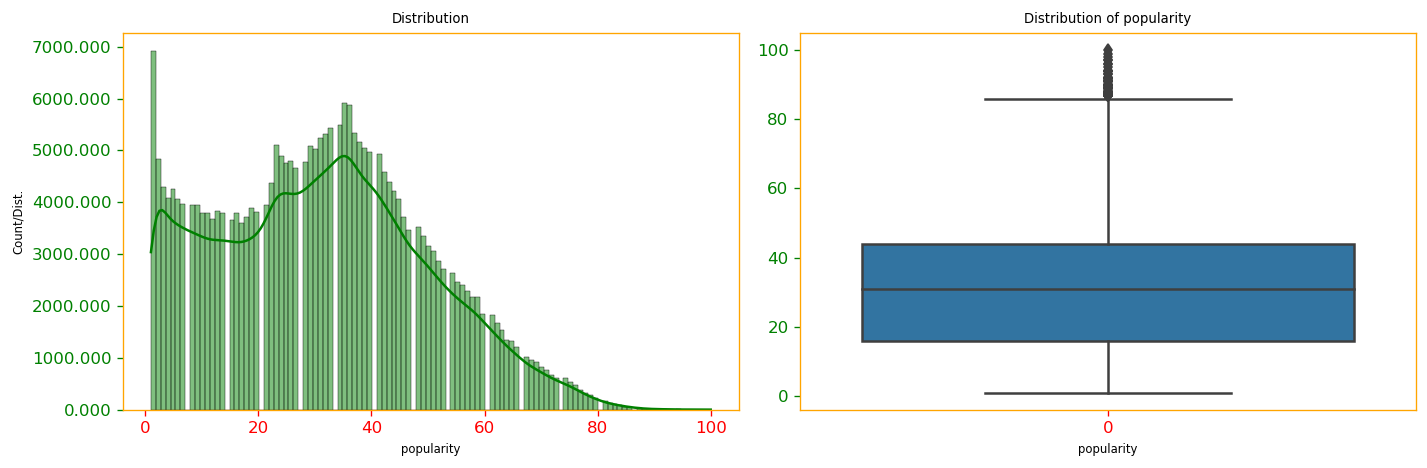

In [11]:
graph(df_popularity, 'popularity')

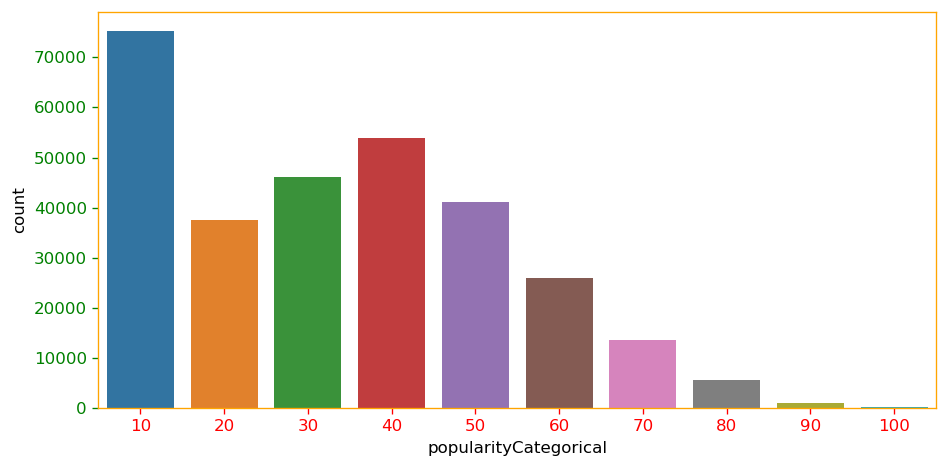

In [14]:
# Vale la pena hacer esto?

def f(row):
    if row['popularity'] < 10:
        val = 10
    elif row['popularity'] < 20:
        val = 20
    elif row['popularity'] < 30:
        val = 30
    elif row['popularity'] < 40:
        val = 40
    elif row['popularity'] < 50:
        val = 50
    elif row['popularity'] < 60:
        val = 60
    elif row['popularity'] < 70:
        val = 70
    elif row['popularity'] < 80:
        val = 80
    elif row['popularity'] < 90:
        val = 90
    else:
        val = 100
    return val

with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
    fig,axes = plt.subplots(nrows=1,ncols=1,dpi=120,figsize = (8,4))
    df['popularityCategorical'] = df.apply(f, axis=1)
    plot=sns.countplot(x='popularityCategorical', data= df)
    plt.tight_layout()

In [63]:
#Dada una serie de numeros
arr= [11,15,22,36,87,45,12,99,65,2,100]

#Podrias ubicarlos en su decena con algo muy simple
grouped= [i//10*10 if (i >= 10) else 10 for i in arr]

'''
Esto es igual a:
grouped=[]
for i in arr:
    if i>=10:
        grouped.append(i//10*10)
    else:
        grouped.append(10)
'''
print("raw: ",arr)
print("parsed: ", grouped)

#Podés usarlo como lambda o declararlo en una función asi
def tens_grouper(num):
    return num//10*10 if (num >= 10) else 10
tens_grouper(85)
#No es exactamente lo que hace la otra pero me parece que tiene el mismo sentido. Podés cambiarle la
#lógica pero iría con una solución así

raw:  [11, 15, 22, 36, 87, 45, 12, 99, 65, 2, 100]
parsed:  [10, 10, 20, 30, 80, 40, 10, 90, 60, 10, 100]


80

In [15]:
frecDF(df_popularity, 'popularity')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
1,6918,6918,2.6108,2.6108
2,4831,11749,1.8231,4.4339
3,4288,16037,1.6182,6.0521
4,4075,20112,1.5378,7.5899
5,4263,24375,1.6088,9.1987
...,...,...,...,...
96,2,264976,0.0008,99.9985
97,2,264978,0.0008,99.9993
98,1,264979,0.0004,99.9997
99,1,264980,0.0004,100.0001


In [16]:
df.energy.describe()

count    299998.000000
mean          0.519285
std           0.256403
min           0.000000
25%           0.312000
50%           0.521000
75%           0.728000
max           1.000000
Name: energy, dtype: float64

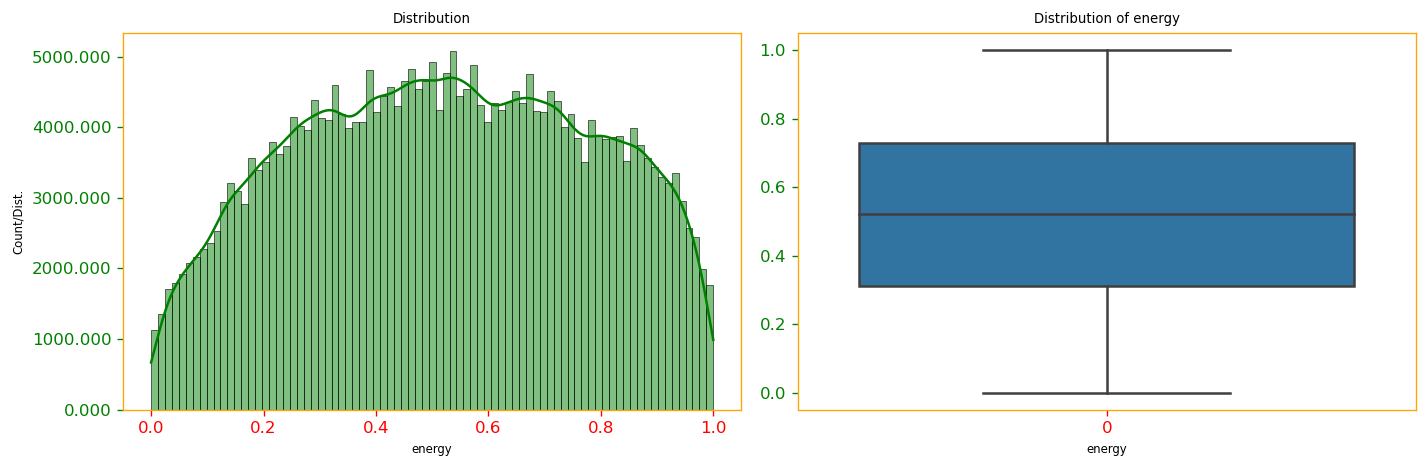

In [17]:
graph(df, "energy")

In [18]:
frecDF(df, 'energy')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.00000,21,21,0.0070,0.0070
0.00002,1,22,0.0003,0.0073
0.00002,3,25,0.0010,0.0083
0.00002,7,32,0.0023,0.0106
0.00002,15,47,0.0050,0.0156
...,...,...,...,...
0.99600,136,299608,0.0453,99.8594
0.99700,121,299729,0.0403,99.8997
0.99800,112,299841,0.0373,99.9370
0.99900,119,299960,0.0397,99.9767


In [19]:
df.tempo.describe()

count    299998.000000
mean        118.029620
std          29.753384
min           0.000000
25%          95.298000
50%         116.605000
75%         135.919000
max         243.507000
Name: tempo, dtype: float64

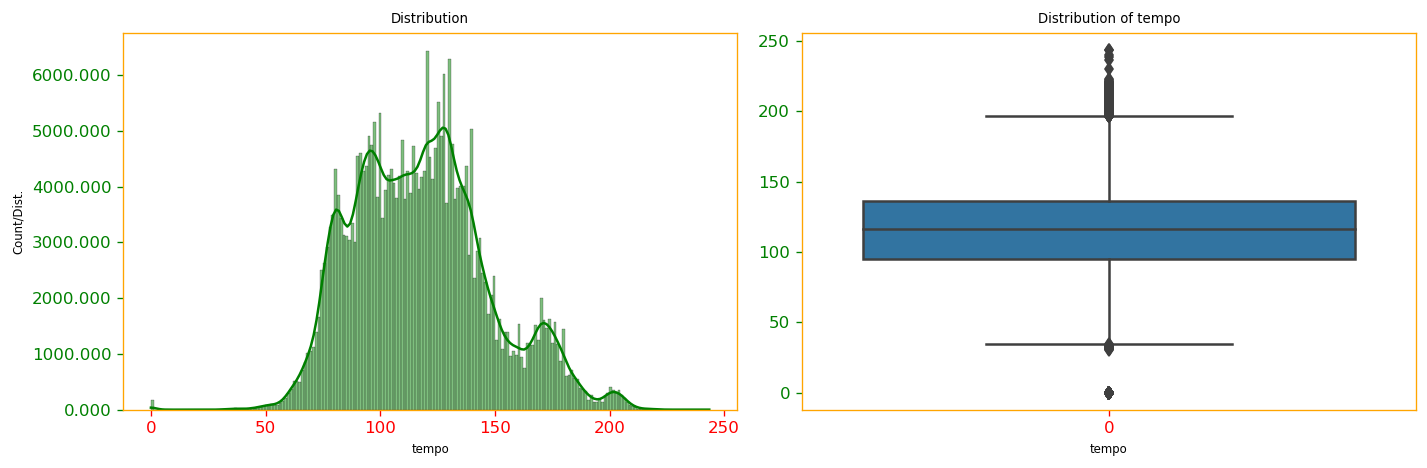

In [20]:
graph(df, 'tempo')

In [21]:
frecDF(df, 'tempo')

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.000,178,178,0.0593,0.0593
30.506,1,179,0.0003,0.0596
30.946,1,180,0.0003,0.0599
31.210,1,181,0.0003,0.0602
31.262,1,182,0.0003,0.0605
...,...,...,...,...
236.799,1,299994,0.0003,99.4772
238.895,1,299995,0.0003,99.4775
239.906,1,299996,0.0003,99.4778
243.372,1,299997,0.0003,99.4781
